In our experiments we split up the code execution to achieve maximum parallelization. This resulted in seperate result json files (included in this repo) which are quickly merged in this notebook. If you re-run the experiments on a single node, you will end up with a single classification_results.json, which you can load manually instead of all the separate files.

In [1]:
from os import getcwd
from os.path import dirname
import sys
sys.path.insert(0, dirname(getcwd()))
from json import loads
from classification.preprocessing import results_json_to_dataframe, get_baselines
from classification.plotting import plot_performances
from pandas import concat
from os import path, mkdir, makedirs

In [2]:
RESULTS_PATH = "../classification/results/"

In [3]:
with open(RESULTS_PATH + "classification_results_class_balance_no_svm.json", 'r') as file:
    class_balance_raw = loads(file.read())
df_class_balance = results_json_to_dataframe(class_balance_raw)

In [4]:
with open(RESULTS_PATH + "classification_results_completeness_no_svm.json", 'r') as file:
    completeness_raw = loads(file.read())
df_completeness = results_json_to_dataframe(completeness_raw)

In [5]:
with open(RESULTS_PATH+ "classification_results_consistent_representation_no_svm.json", 'r') as file:
    cons_repr_raw = loads(file.read())
df_consistent_representation = results_json_to_dataframe(cons_repr_raw)

/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:82: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[mask, 'quality_train'] = df[mask].quality_train.str[0]
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:83: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[mask, 'quality_test'] = df[mask].quality_test.str[0]


In [6]:
with open(RESULTS_PATH + "classification_results_target_accuracy_no_svm.json", 'r') as file:
    target_accuracy_raw = loads(file.read())
df_target_accuracy = results_json_to_dataframe(target_accuracy_raw)

In [7]:
with open(RESULTS_PATH + "classification_results_feature_accuracy_no_svm.json", 'r') as file:
    feature_accuracy_raw = loads(file.read())
df_feature_accuracy = results_json_to_dataframe(feature_accuracy_raw)

In [8]:
with open(RESULTS_PATH + "classification_results_uniqueness_no_svm.json", 'r') as file:
    uniqueness_raw = loads(file.read())
df_uniqueness = results_json_to_dataframe(uniqueness_raw)

In [9]:
with open(RESULTS_PATH + "classification_results_svm.json", 'r') as file:
    svm_raw = loads(file.read())
df_svm = results_json_to_dataframe(svm_raw)

In [10]:
with open(RESULTS_PATH + "classification_results_deep_learning.json", 'r') as file:
    dl_raw = loads(file.read())
df_dl = results_json_to_dataframe(dl_raw)

In [11]:
with open(RESULTS_PATH + "classification_results_covid_no_tabnet.json", 'r') as file:
    dl_raw = loads(file.read())
df_covid = results_json_to_dataframe(dl_raw)

/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:59: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, quality] = new_quality_values


In [12]:
with open(RESULTS_PATH + "classification_results_covid_tabnet.json", 'r') as file:
    dl_raw = loads(file.read())
df_covid_tabnet = results_json_to_dataframe(dl_raw)

/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:59: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, quality] = new_quality_values


In [13]:
with open(RESULTS_PATH + "classification_results_tabnet_original_data.json", 'r') as file:
    dl_raw = loads(file.read())
df_tabnet = results_json_to_dataframe(dl_raw)

In [14]:
df = concat([df_consistent_representation, df_feature_accuracy, df_class_balance, df_completeness, df_target_accuracy, df_uniqueness, df_svm, df_dl, df_tabnet, df_covid, df_covid_tabnet])

In [15]:
baselines = get_baselines()
scenarios = ['train_polluted_test_clean', 'train_clean_test_polluted', 'train_polluted_test_polluted']

/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/op

TelcoCustomerChurn.csv ConsistentRepresentationPolluter train_polluted_test_clean
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv ConsistentRepresentationPolluter train_clean_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv ConsistentRepresentationPolluter train_polluted_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv ConsistentRepresentationPolluter train_polluted_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv ConsistentRepresentationPolluter train_polluted_test_clean
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv ConsistentRepresentationPolluter train_clean_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv ConsistentRepresentationPolluter train_polluted_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv ConsistentRepresentationPolluter train_polluted_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data ConsistentRepresentationPolluter train_polluted_test_clean
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data ConsistentRepresentationPolluter train_clean_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data ConsistentRepresentationPolluter train_polluted_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data ConsistentRepresentationPolluter train_polluted_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv ConsistentRepresentationPolluter train_polluted_test_clean
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv ConsistentRepresentationPolluter train_clean_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv ConsistentRepresentationPolluter train_polluted_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv ConsistentRepresentationPolluter train_polluted_test_polluted
Quality not in columns
Index(['dataset', 'polluter', 'scenario', 'algorithm', 'pollution_level',
       'accuracy_mean', 'accuracy_std', 'f1-score_mean', 'f1-score_std',
       'quality_mean', 'quality_std', 'quality_train_mean',
       'quality_train_std', 'quality_test_mean', 'quality_test_std'],
      dtype='object')


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

TelcoCustomerChurn.csv FeatureAccuracyPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

TelcoCustomerChurn.csv FeatureAccuracyPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

TelcoCustomerChurn.csv FeatureAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

TelcoCustomerChurn.csv FeatureAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

SouthGermanCredit.csv FeatureAccuracyPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

SouthGermanCredit.csv FeatureAccuracyPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

SouthGermanCredit.csv FeatureAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

SouthGermanCredit.csv FeatureAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

cmc.data FeatureAccuracyPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

cmc.data FeatureAccuracyPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

cmc.data FeatureAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

cmc.data FeatureAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

covid_data_pre_processed.csv FeatureAccuracyPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

covid_data_pre_processed.csv FeatureAccuracyPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

covid_data_pre_processed.csv FeatureAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:241: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return_df.loc[mask, 'binned'] = cut(return_df[mask].quality, bins=len(bins), labels=bins)
/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

covid_data_pre_processed.csv FeatureAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv ClassBalancePolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv ClassBalancePolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv ClassBalancePolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv ClassBalancePolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv ClassBalancePolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv ClassBalancePolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv ClassBalancePolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv ClassBalancePolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data ClassBalancePolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data ClassBalancePolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data ClassBalancePolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data ClassBalancePolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv ClassBalancePolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv ClassBalancePolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv ClassBalancePolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv ClassBalancePolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv CompletenessPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv CompletenessPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv CompletenessPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv CompletenessPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv CompletenessPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv CompletenessPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv CompletenessPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv CompletenessPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data CompletenessPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data CompletenessPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data CompletenessPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data CompletenessPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv CompletenessPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv CompletenessPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv CompletenessPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv CompletenessPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv TargetAccuracyPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv TargetAccuracyPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv TargetAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv TargetAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv TargetAccuracyPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv TargetAccuracyPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv TargetAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv TargetAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data TargetAccuracyPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data TargetAccuracyPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data TargetAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data TargetAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv TargetAccuracyPolluter train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv TargetAccuracyPolluter train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv TargetAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv TargetAccuracyPolluter train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv UniquenessPolluter_normal train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv UniquenessPolluter_normal train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv UniquenessPolluter_normal train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv UniquenessPolluter_normal train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv UniquenessPolluter_normal train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv UniquenessPolluter_normal train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv UniquenessPolluter_normal train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv UniquenessPolluter_normal train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data UniquenessPolluter_normal train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data UniquenessPolluter_normal train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data UniquenessPolluter_normal train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data UniquenessPolluter_normal train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv UniquenessPolluter_normal train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv UniquenessPolluter_normal train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv UniquenessPolluter_normal train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv UniquenessPolluter_normal train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv UniquenessPolluter_uniform train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv UniquenessPolluter_uniform train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv UniquenessPolluter_uniform train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


TelcoCustomerChurn.csv UniquenessPolluter_uniform train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv UniquenessPolluter_uniform train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv UniquenessPolluter_uniform train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv UniquenessPolluter_uniform train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


SouthGermanCredit.csv UniquenessPolluter_uniform train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data UniquenessPolluter_uniform train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data UniquenessPolluter_uniform train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data UniquenessPolluter_uniform train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


cmc.data UniquenessPolluter_uniform train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv UniquenessPolluter_uniform train_polluted_test_clean


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv UniquenessPolluter_uniform train_clean_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv UniquenessPolluter_uniform train_polluted_test_polluted


/home/sedirmohammed/dev/DataQuality_4AI/dataqualiy_4ai/classification/preprocessing.py:194: FutureWarning: ['polluter_config'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.drop(columns=['seed']).groupby(by, as_index=False).agg([mean, std]).reset_index()


covid_data_pre_processed.csv UniquenessPolluter_uniform train_polluted_test_polluted


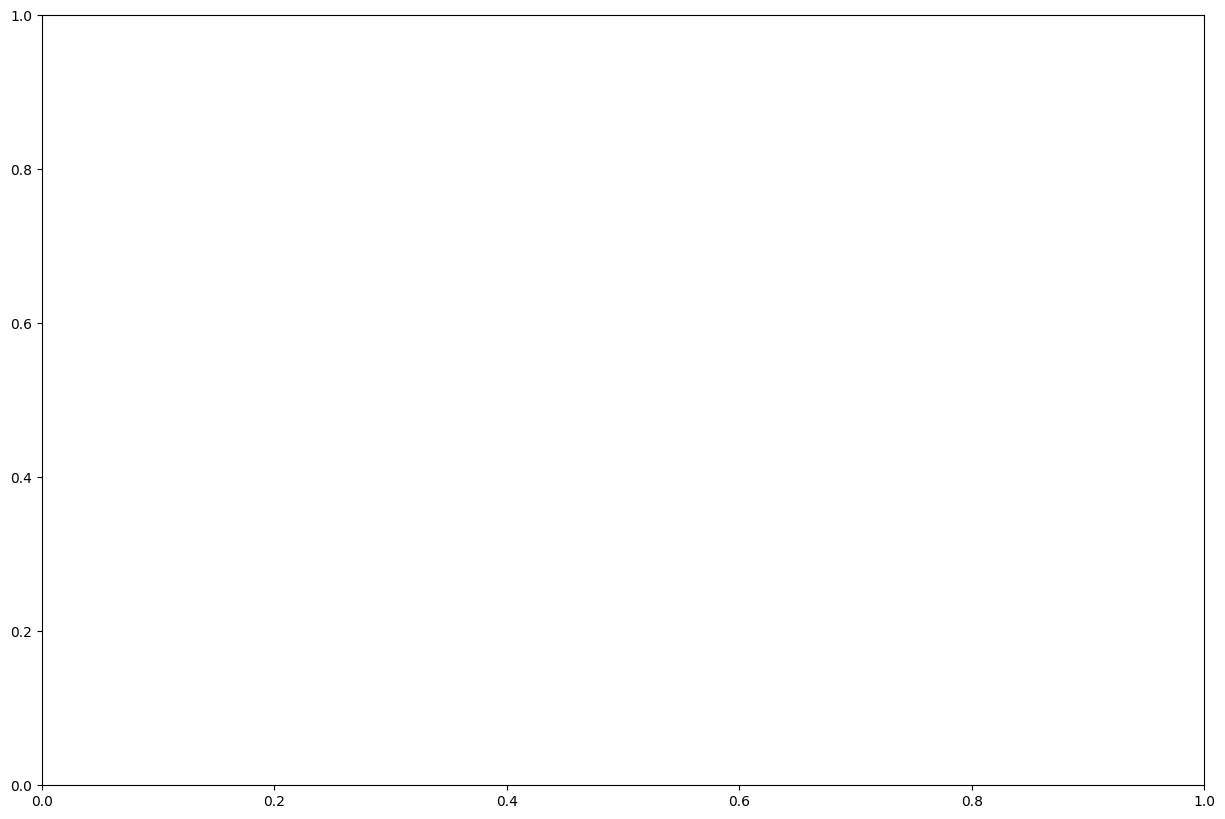

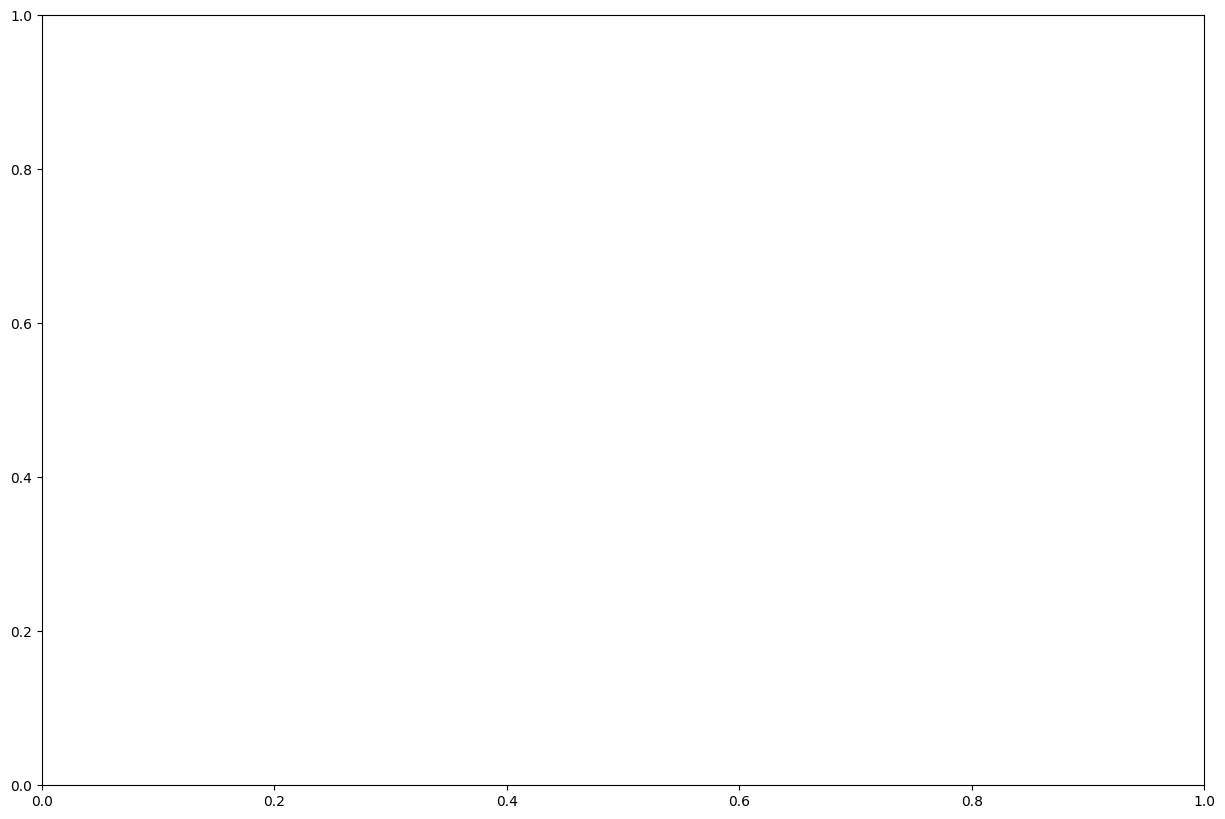

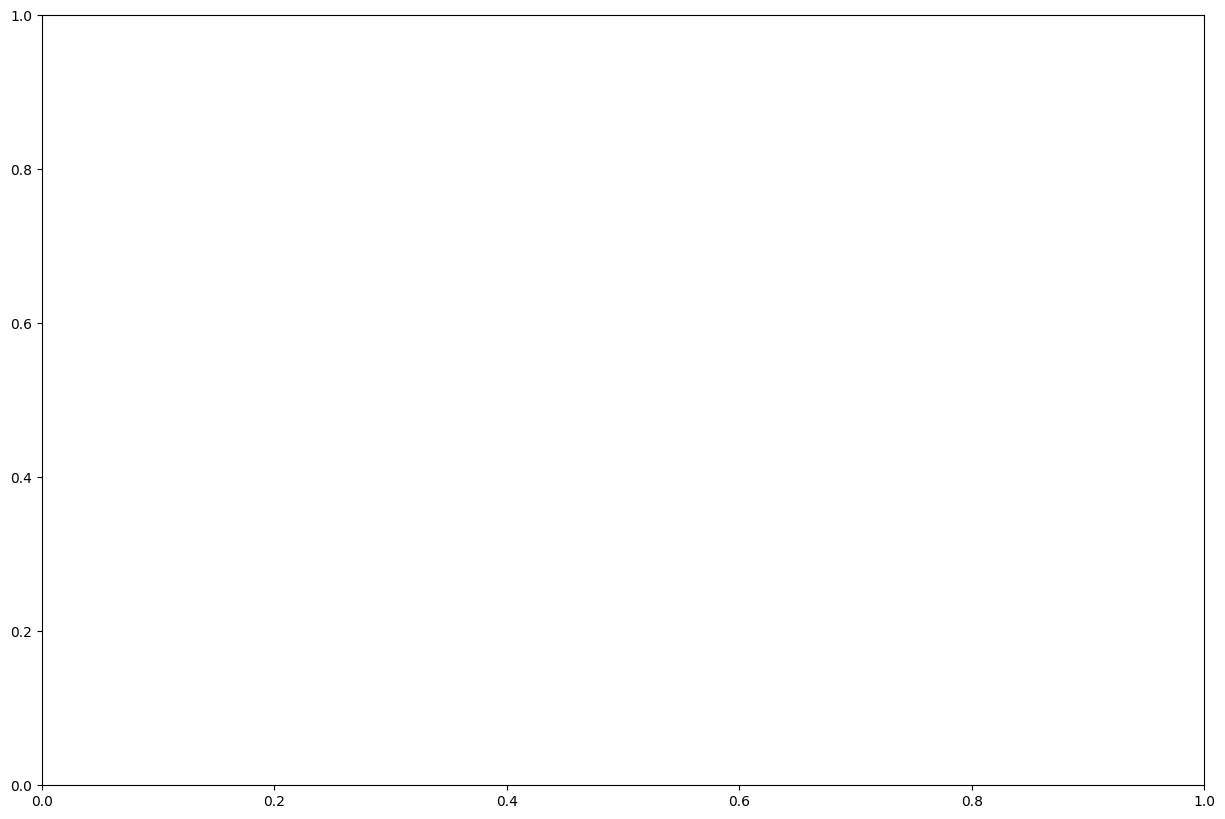

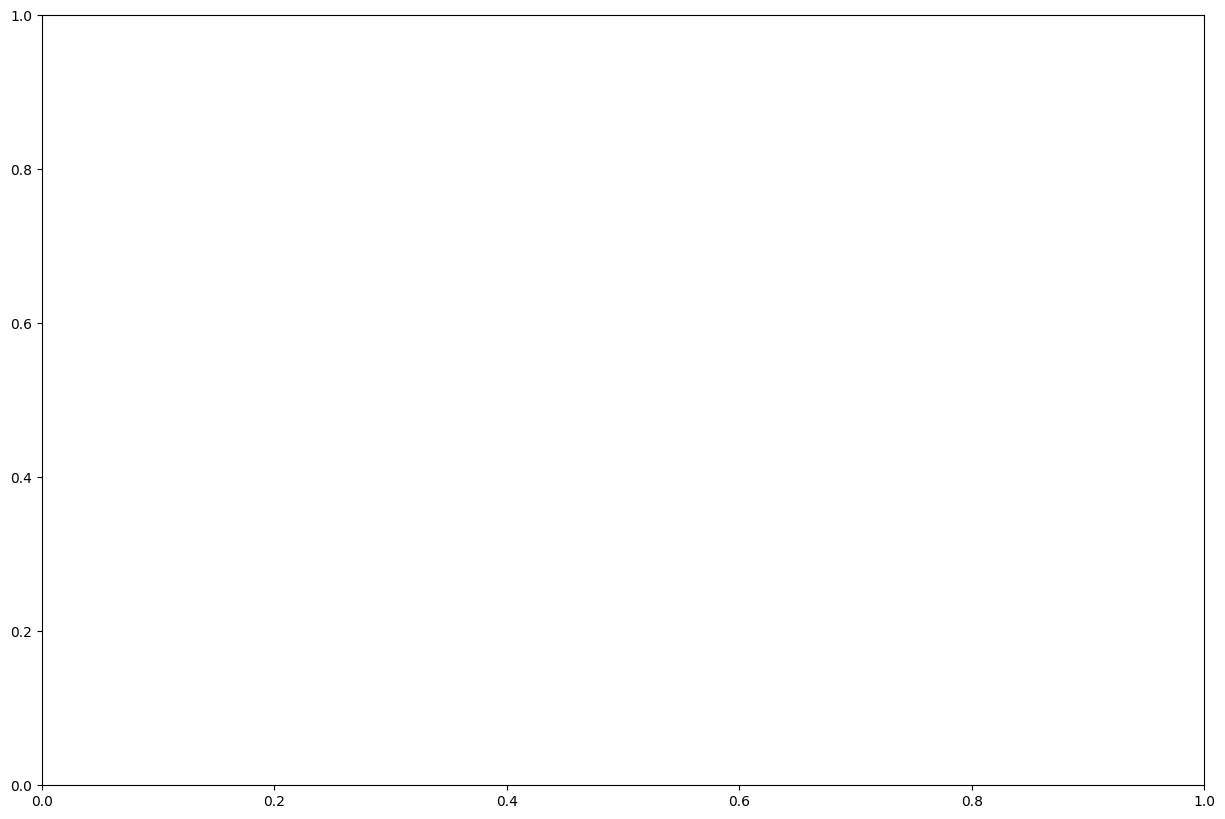

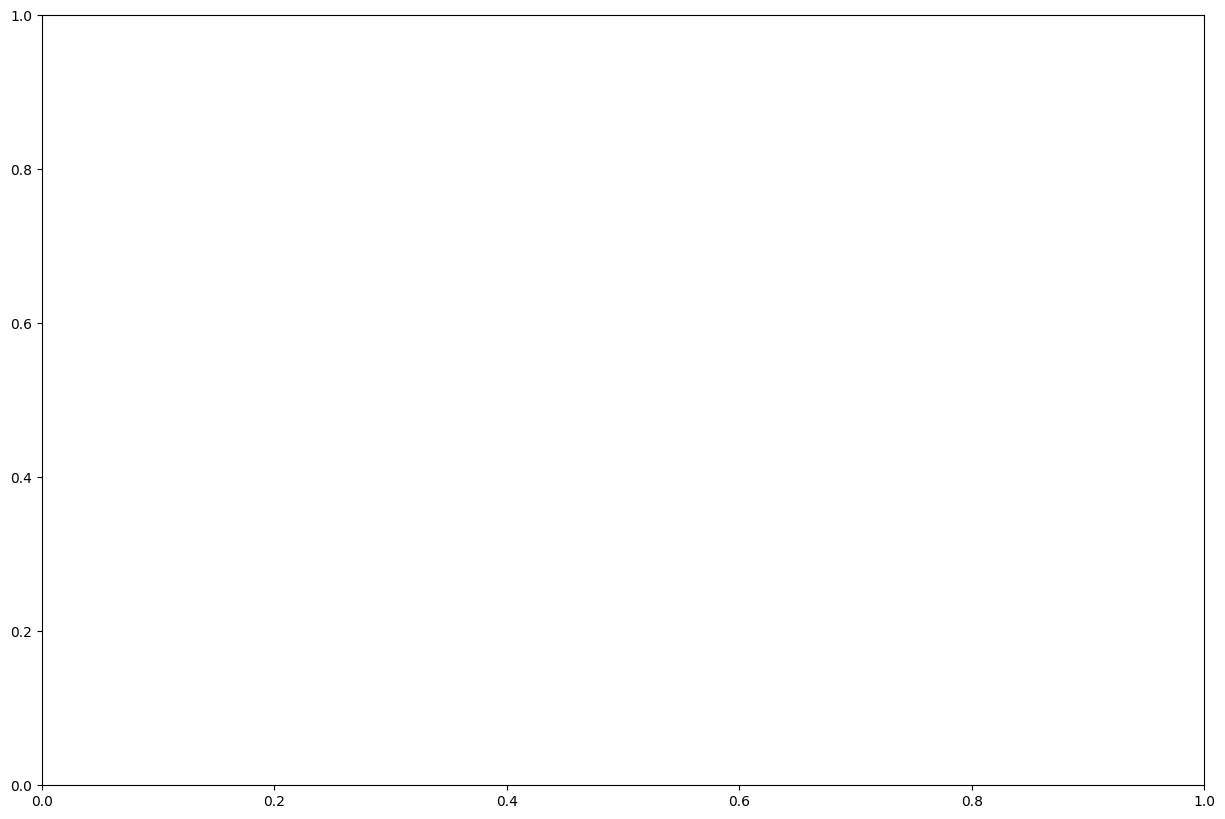

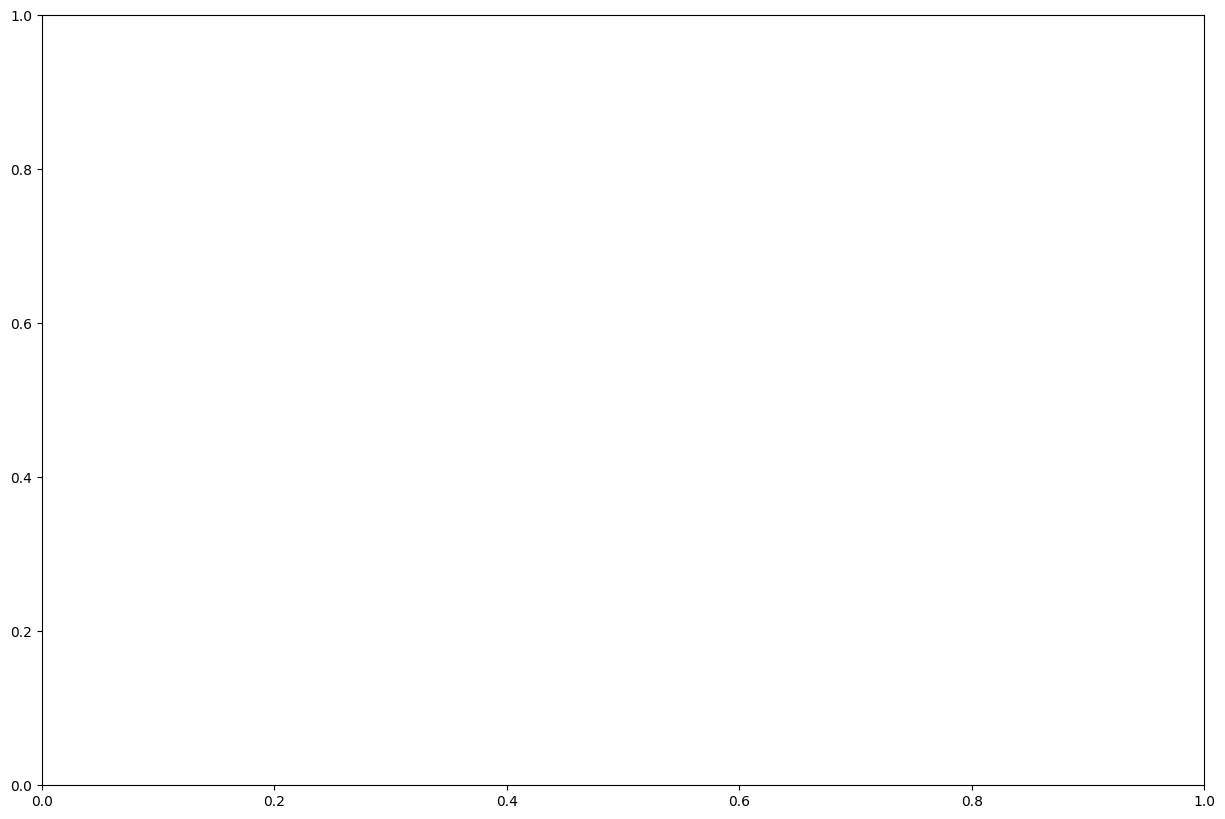

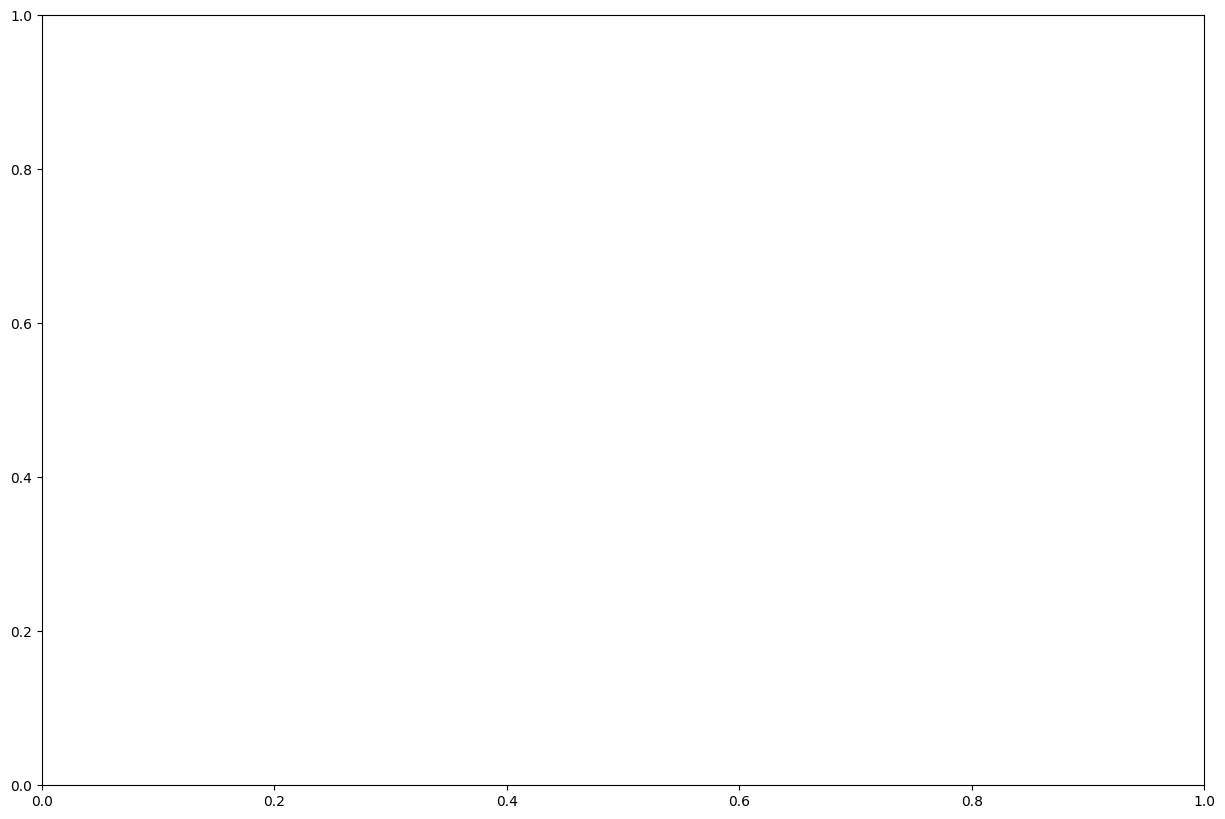

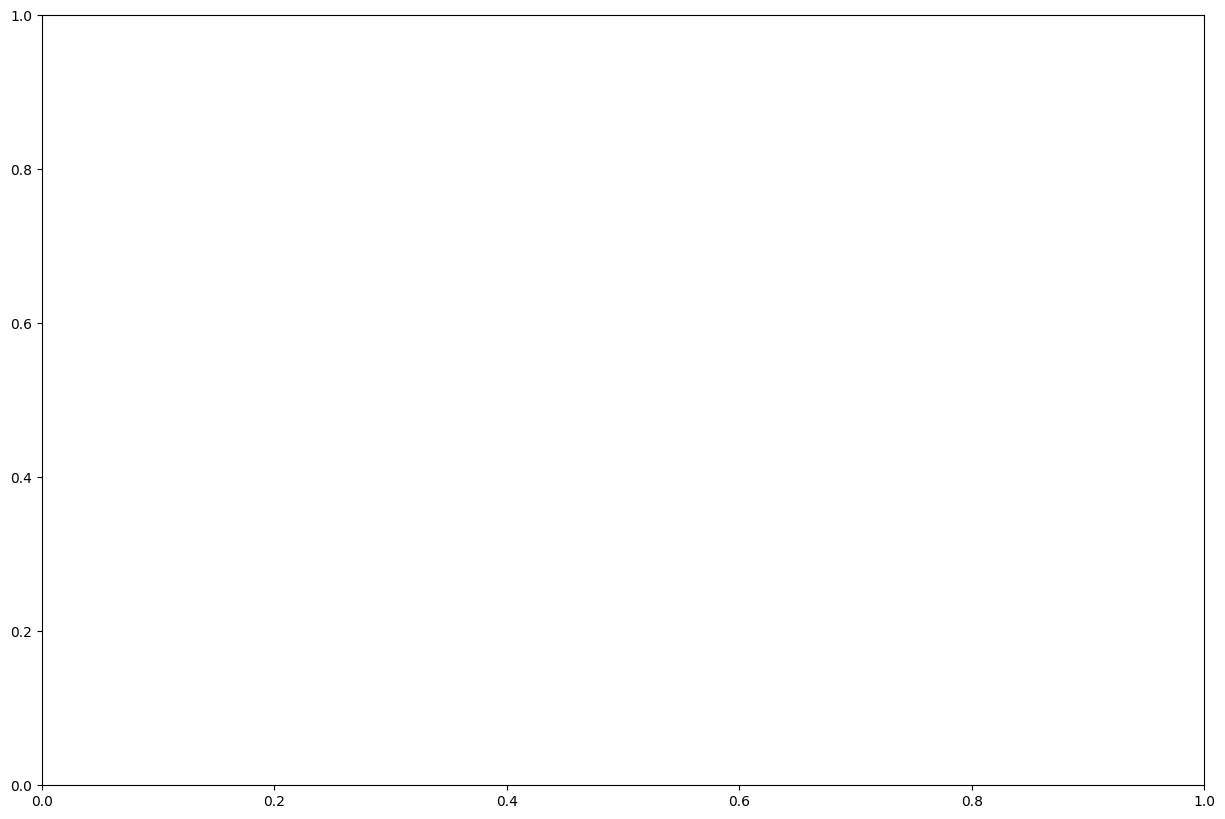

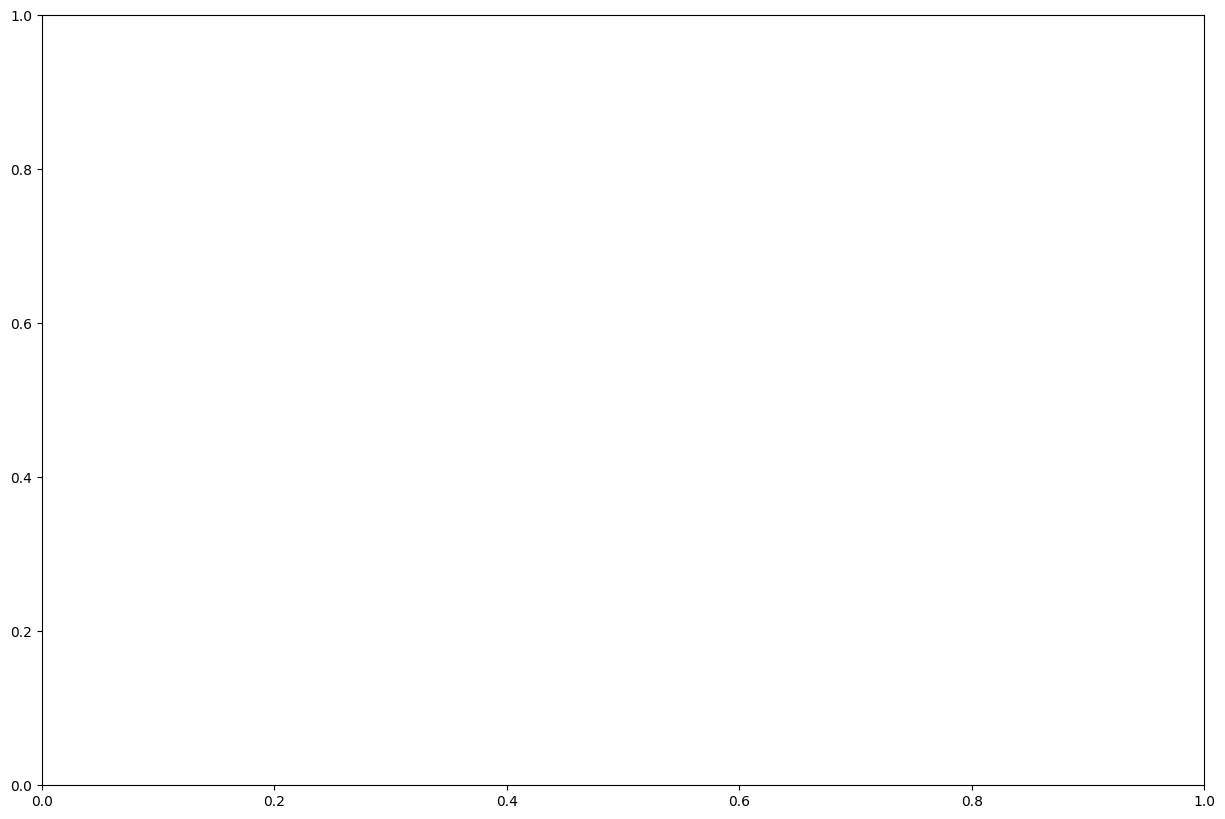

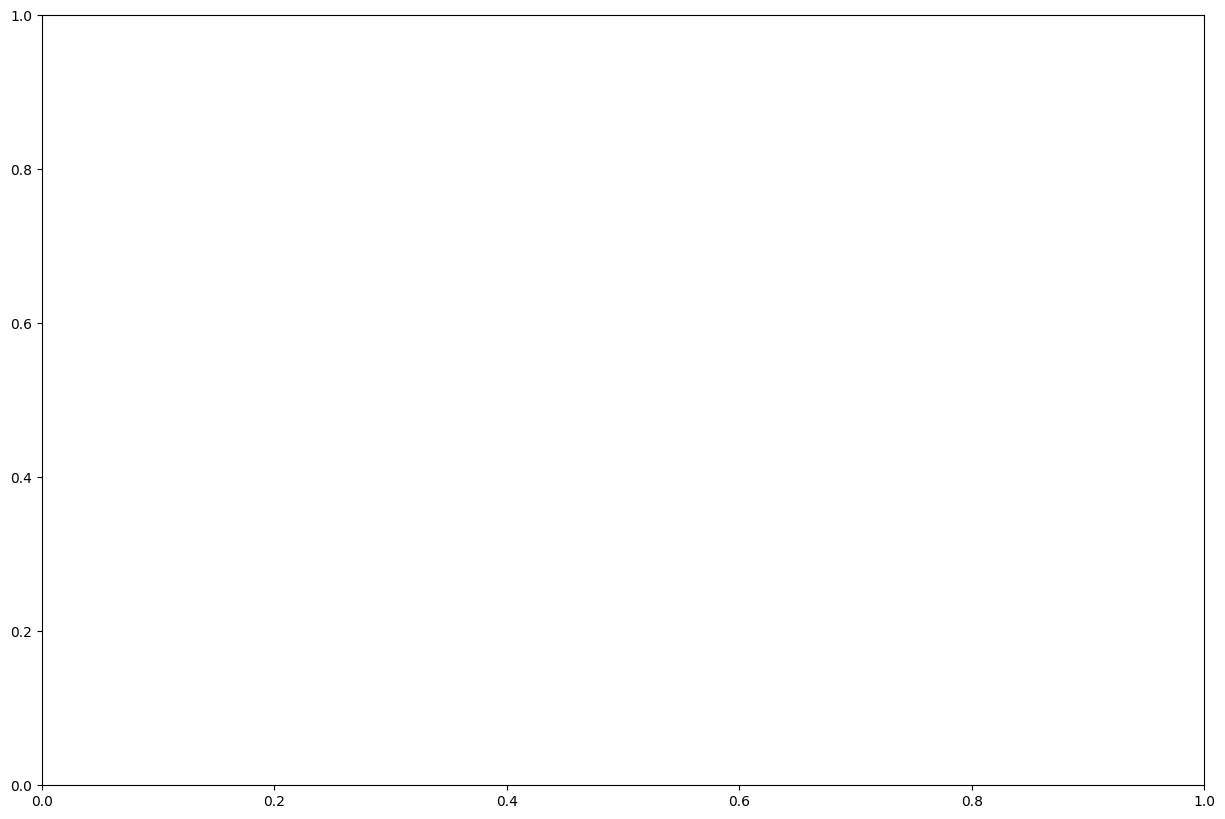

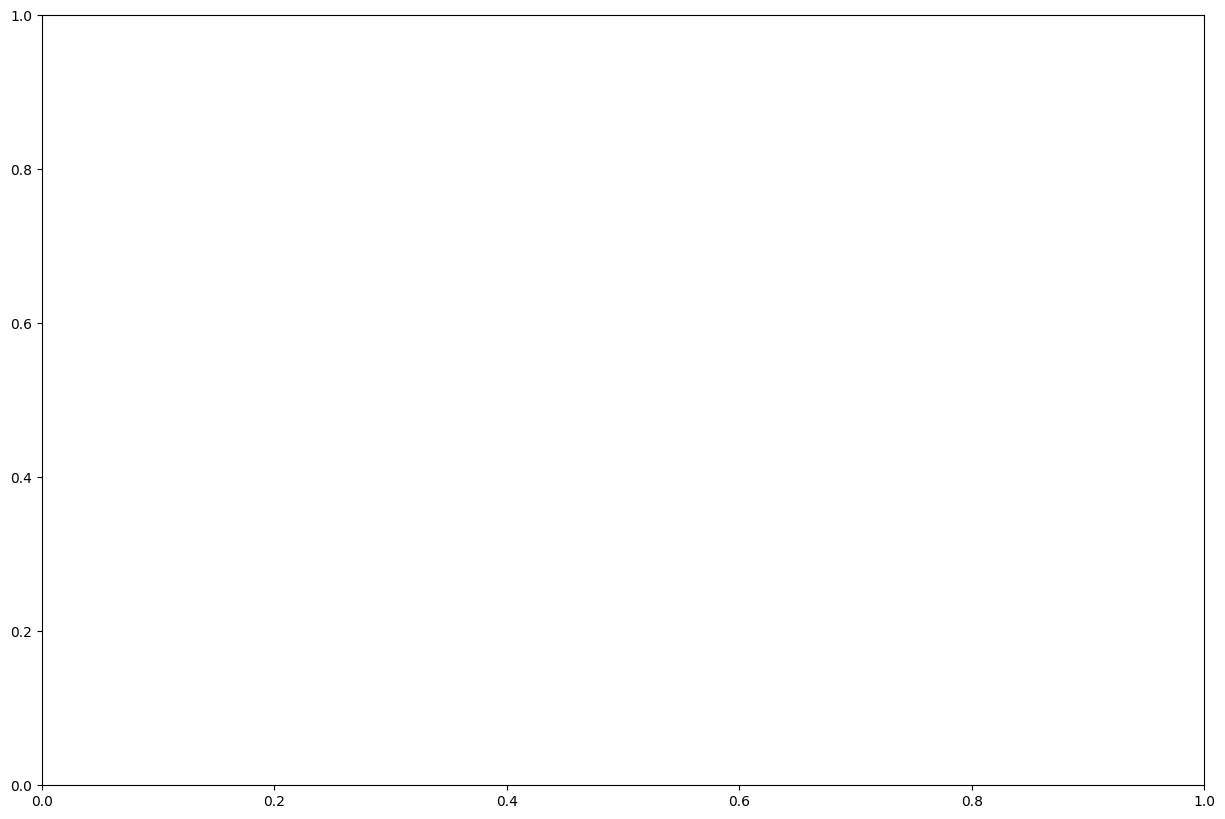

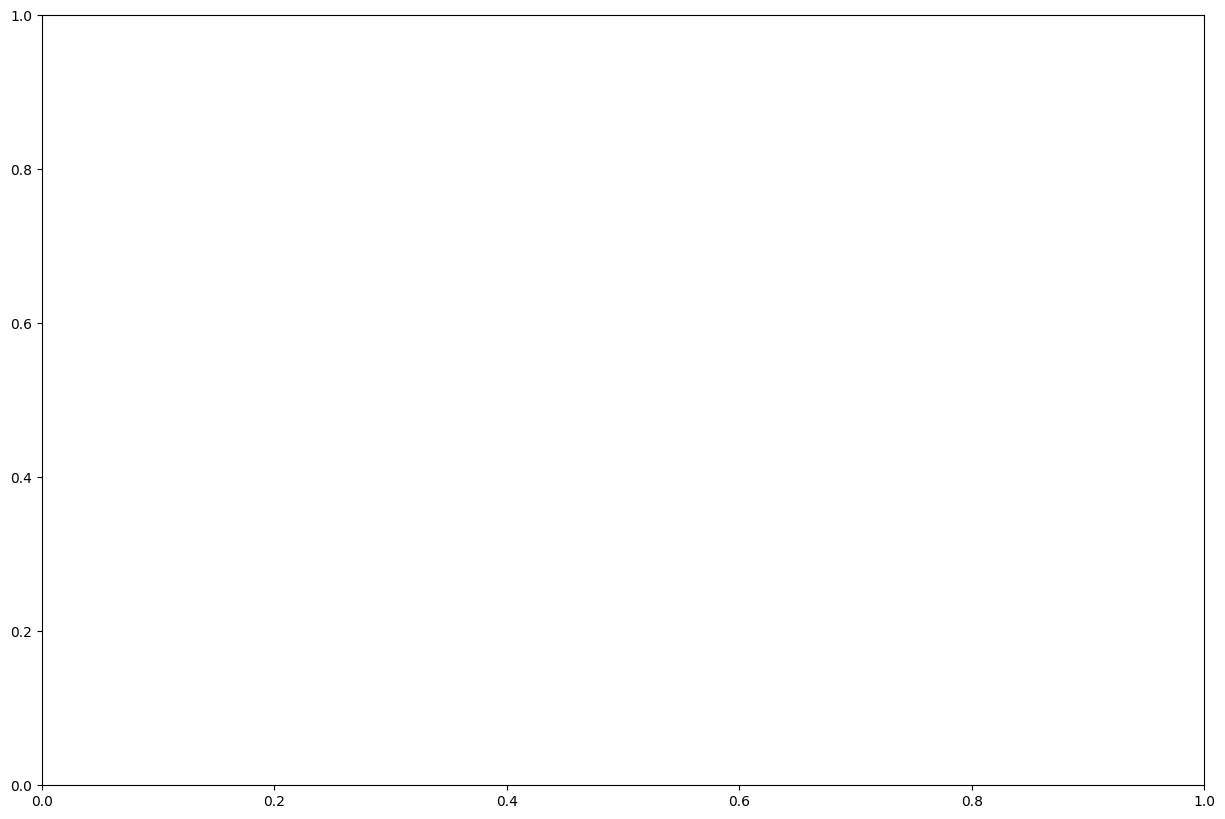

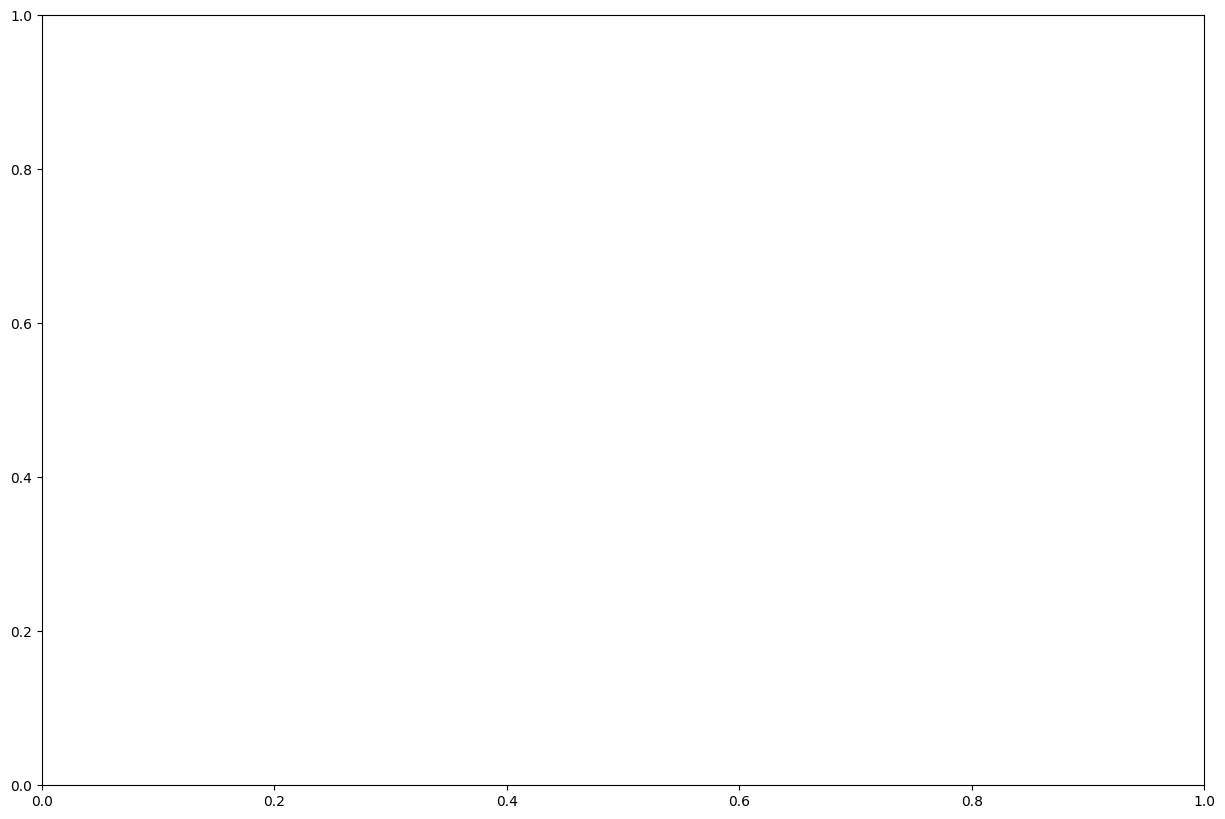

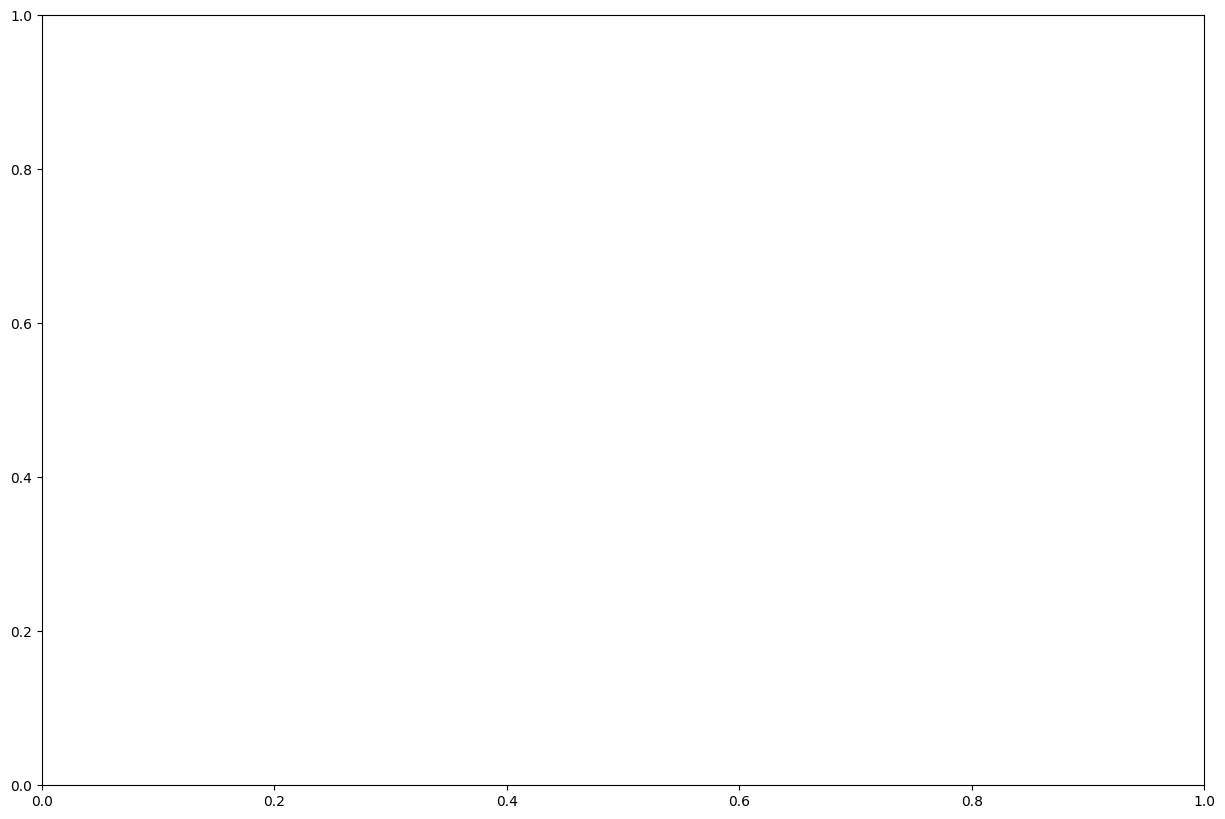

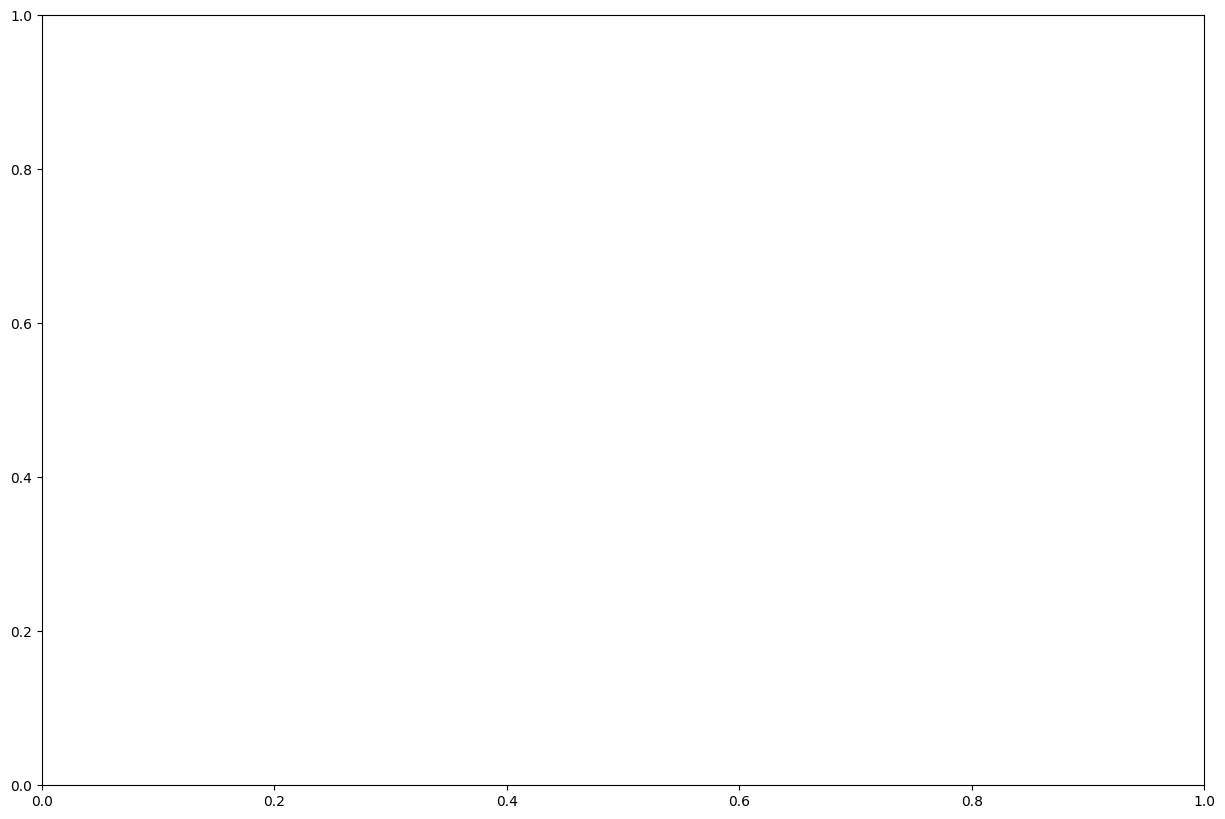

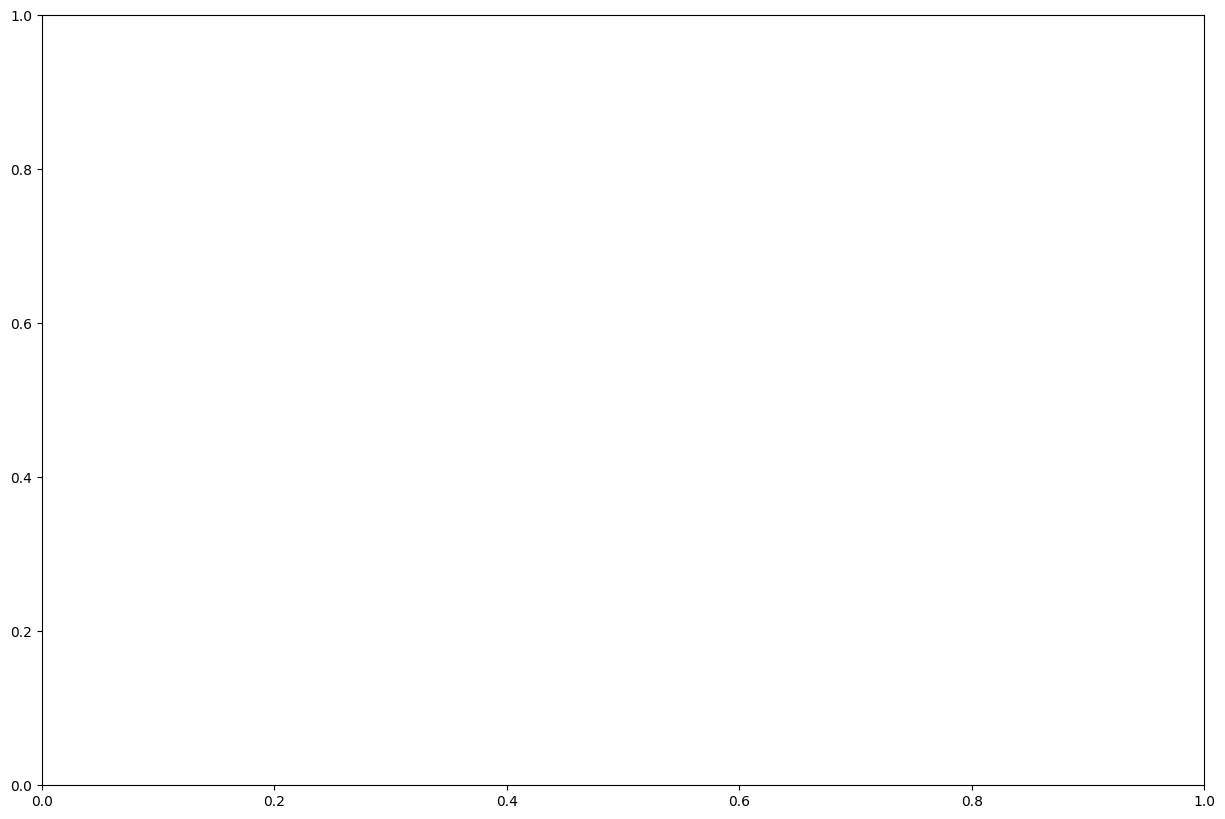

In [20]:
DATASET_NAMES = {
    'SouthGermanCredit.csv': 'credit',
    'TelcoCustomerChurn.csv': 'telco',
    'cmc.data': 'contraceptive',
    'covid_data_pre_processed.csv': 'covid',
}

for polluter in df.polluter.unique():
    for dataset in df.dataset.unique():
        for scenario in scenarios:
            #save_path = f"../classification/results/figures/{polluter}/accuracy/{DATASET_NAMES[dataset]}_{scenario}_{polluter}"
            #makedirs(path.dirname(save_path), exist_ok=True)
            #plot_performances(df, dataset, polluter, scenario, baselines, save_path=f"{save_path}.png")
            # save_path = f"../classification/results/figures/{polluter}/f1_score/{DATASET_NAMES[dataset]}_{scenario}_{polluter}"
            if scenario == 'train_polluted_test_polluted':
                show_legend = True
                save_path = f"../classification/results/figures/{DATASET_NAMES[dataset]}_{scenario}_{polluter}_legend"
                makedirs(path.dirname(save_path), exist_ok=True)
                plot_performances(df, dataset, polluter, scenario, baselines, use_f1=True, save_path=f"{save_path}.png", show_legend=show_legend)

            save_path = f"../classification/results/figures/{DATASET_NAMES[dataset]}_{scenario}_{polluter}"
            makedirs(path.dirname(save_path), exist_ok=True)
            plot_performances(df, dataset, polluter, scenario, baselines, use_f1=True, save_path=f"{save_path}.png", show_legend=False)

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
